In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.2'

In [3]:
x = tf.constant(10.5)
y = tf.constant(11.2)
z = x+y
print(z)

tf.Tensor(21.7, shape=(), dtype=float32)


In [4]:
hello = tf.constant("Hello World")
print(hello.numpy())

b'Hello World'


In [5]:
x1 = tf.constant(20)
x2 = tf.constant(34)
x3 = tf.add(x1,x2)
print(x3.numpy())

54


In [7]:
xx = tf.Variable([[3,4,5],[5,6,9]])
xy = tf.Variable([[3,4,6,],[7,1,2]])
xs = tf.add(xx,xy)
print(xs.numpy())

[[ 6  8 11]
 [12  7 11]]


In [8]:
xx.numpy()

array([[3, 4, 5],
       [5, 6, 9]], dtype=int32)

In [9]:
xx.shape

TensorShape([2, 3])

In [11]:
print(tf.rank(xx))

tf.Tensor(2, shape=(), dtype=int32)


In [12]:
game = tf.constant("Apex Legends")
print(game.numpy())

b'Apex Legends'


In [15]:
sudin = tf.constant("Mars nuked by aliens. ")
sudin1 = tf.constant("Sudin to fight off the aliens")
sudin2 = tf.add(sudin, sudin1)
print(sudin2.numpy())

b'Mars nuked by aliens. Sudin to fight off the aliens'


In [18]:
n = int(input("Enter the number:"))

sum = tf.Variable(1)

for i in range(1,n+1):
  i = tf.constant(i)
  sum = tf.multiply(sum,i)

print(sum.numpy())

Enter the number:5
120


In [21]:
sudin = tf.constant("Sudin", shape = [3,3])
print(sudin.numpy())

[[b'Sudin' b'Sudin' b'Sudin']
 [b'Sudin' b'Sudin' b'Sudin']
 [b'Sudin' b'Sudin' b'Sudin']]


In [28]:
import numpy as np

x = tf.constant(np.zeros((3,4)))
y = tf.constant(x, shape=(2,6))
y

<tf.Tensor: shape=(2, 6), dtype=float64, numpy=
array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])>

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
import pandas as pd
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
x = df['sepal length (cm)'].values
x

In [ ]:
y = df['petal length (cm)'].values
y

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [55]:
W = tf.Variable(2.)
b = tf.Variable(1.)

train_steps = 100
learning_rate = tf.constant(0.01)
for i in range(train_steps):
  with tf.GradientTape() as tape:

    output_given = x_train*W + b

    #Finding the minimum mean squared loss

    error = output_given - y_train
    loss = tf.reduce_mean(tf.square(error))

  dW, db = tape.gradient(loss, [W,b])

  W.assign_sub(W*learning_rate)
  b.assign_sub(b*learning_rate)

  if i%20==0:
    print(f"Loss at step {i} is {loss}")

print(f"W:{W.numpy()} and b:{b.numpy()}")

Loss at step 0 is 80.7653579711914
Loss at step 20 is 45.08838653564453
Loss at step 40 is 23.83009147644043
Loss at step 60 is 11.74250316619873
Loss at step 80 is 5.401318073272705
W:0.7320645451545715 and b:0.36603227257728577


In [52]:
train_X = [3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
           7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1]
train_Y = [1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
           2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3]
NUM_EXAMPLES = len(train_X)


#create model paramters with initial values 
W = tf.Variable(0.)
b = tf.Variable(0.)

#training info
train_steps = 100
learning_rate = 0.01

for i in range(train_steps):
  
  #watch the gradient flow 
  with tf.GradientTape() as tape:
    
    #forward pass 
    yhat = train_X * W + b
    
    #calcuate the loss (difference squared error)
    error = yhat - train_Y
    loss = tf.reduce_mean(tf.square(error))
  
  #evalute the gradient with the respect to the paramters
  dW, db = tape.gradient(loss, [W, b])

  #update the paramters using Gradient Descent  
  W.assign_sub(dW * learning_rate)
  b.assign_sub(db* learning_rate)

  #print the loss every 20 iterations 
  if i % 20 == 0:
    print("Loss at step {:03d}: {:.3f}".format(i, loss))
      
print(f'W : {W.numpy()} , b  = {b.numpy()} ')

Loss at step 000: 6.100
Loss at step 020: 0.217
Loss at step 040: 0.211
Loss at step 060: 0.206
Loss at step 080: 0.201
W : 0.3344224691390991 , b  = 0.2118747979402542 


In [39]:
x = tf.constant(11)
y = tf.square(x)
y.numpy()

121

In [44]:
n = tf.Variable(45)
n.assign_sub(n*3)
n.numpy()

-90

In [56]:
from sklearn.datasets import load_wine
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [57]:
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
x = wine_df['alcohol'].values
x

In [ ]:
y = wine_df['magnesium'].values
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
x_train

In [62]:
W1 = tf.Variable(1.0)
b1 = tf.Variable(2.0)

In [63]:
train_steps = 100
learner = 0.00045

In [65]:
for i in range(train_steps):
  with tf.GradientTape() as tape:
    output_pred = x_train*W1 + b1

    #find the loss of reduced mean squared error

    error = output_pred - y_train
    loss = tf.reduce_mean(tf.square(error))

    dW, db = tape.gradient(loss, [W1,b1])
    W.assign_sub(dW*learner)
    b.assign_sub(db*learner)
  
  if i%10==0:
    print(f"Loss at {i} is {loss}")

Loss at 0 is 7524.84765625
Loss at 10 is 7524.84765625
Loss at 20 is 7524.84765625
Loss at 30 is 7524.84765625
Loss at 40 is 7524.84765625
Loss at 50 is 7524.84765625
Loss at 60 is 7524.84765625
Loss at 70 is 7524.84765625
Loss at 80 is 7524.84765625
Loss at 90 is 7524.84765625


In [66]:
output_model = x_test*W1 + b1

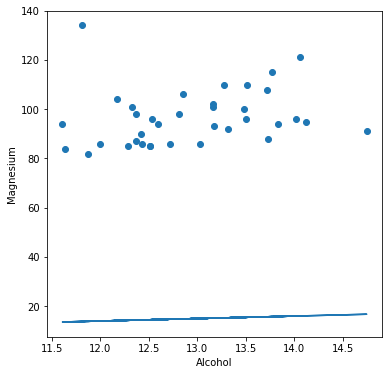

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.scatter(x_test, y_test)
plt.plot(x_test, output_model)
plt.xlabel("Alcohol")
plt.ylabel("Magnesium")
plt.show()

In [ ]:
x = wine_df['ash'].values
x

In [ ]:
y = wine_df['color_intensity'].values
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)
x_train

In [ ]:
y_train

In [73]:
W2 = tf.Variable(4.0)
b2 = tf.Variable(5.0)

In [74]:
learn_steps = 500
learn_rate = 0.0072

In [80]:
for i in range(learn_steps):
  with tf.GradientTape() as tape:
    output_prediction = x_train*W2 + b2

    #Reduced mean squared error value for loss
    error = output_prediction - y_train
    loss = tf.reduce_mean(tf.square(error))

    dW, db = tape.gradient(loss, [W2, b2])

    W2.assign_sub(dW*learn_rate)
    b2.assign_sub(db*learn_rate)

  if i%10==0:
    print(f"Loss at step:{i} is {loss}")

Loss at step:0 is 5.020051956176758
Loss at step:10 is 5.0152130126953125
Loss at step:20 is 5.0135674476623535
Loss at step:30 is 5.012356758117676
Loss at step:40 is 5.011207580566406
Loss at step:50 is 5.010070323944092
Loss at step:60 is 5.008937835693359
Loss at step:70 is 5.007810115814209
Loss at step:80 is 5.006685256958008
Loss at step:90 is 5.005564212799072
Loss at step:100 is 5.004446983337402
Loss at step:110 is 5.003334045410156
Loss at step:120 is 5.002224445343018
Loss at step:130 is 5.001118183135986
Loss at step:140 is 5.000016212463379
Loss at step:150 is 4.998917579650879
Loss at step:160 is 4.997822284698486
Loss at step:170 is 4.996730804443359
Loss at step:180 is 4.995643615722656
Loss at step:190 is 4.994559288024902
Loss at step:200 is 4.993478775024414
Loss at step:210 is 4.992402076721191
Loss at step:220 is 4.991329193115234
Loss at step:230 is 4.990259170532227
Loss at step:240 is 4.989192962646484
Loss at step:250 is 4.988130569458008
Loss at step:260 is 4

In [81]:
output_pred1 = x_test*W2 + b2
output_pred1

<tf.Tensor: shape=(45,), dtype=float32, numpy=
array([5.253561 , 4.225546 , 5.634308 , 5.482009 , 4.301695 , 4.796665 ,
       4.377844 , 4.301695 , 5.786606 , 4.720516 , 3.349828 , 5.025113 ,
       5.938905 , 6.4719496, 4.5682173, 4.872814 , 4.720516 , 6.0150537,
       5.025113 , 6.6242485, 8.299533 , 5.9769793, 5.558158 , 6.205427 ,
       4.606292 , 6.0150537, 4.720516 , 4.872814 , 4.720516 , 5.025113 ,
       5.177412 , 3.273679 , 6.3196516, 4.872814 , 3.578276 , 5.0631876,
       4.796665 , 4.4920683, 5.101263 , 4.796665 , 5.025113 , 6.9288454,
       6.3196516, 6.3196516, 3.1975296], dtype=float32)>

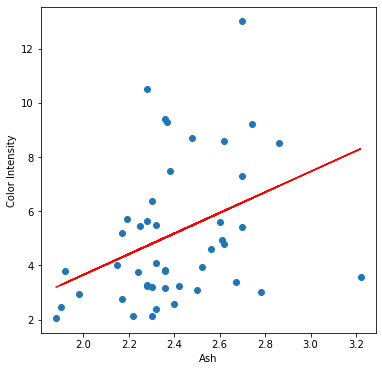

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6,6))
plt.scatter(x_test, y_test)
plt.plot(x_test, output_pred1, c="red")
plt.xlabel("Ash")
plt.ylabel("Color Intensity")
plt.show()